### Увеличение стоимости обслуживания - проверка гипотез

Требуется провести анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике и определить ключевые драйверы изменения цены лечения. 

**Определение:** Медицинский кейс - последовательность медицинских услуг, полученных одним застрахованном в одной клинике с интервалом между любыми соседними по дате услугами не более 14 дней. Т.е. между любыми 2-мя соседними услугами в кейсе не должно быть разрыва более 14 дней.

**Определение:** Визит - уникальное сочетание даты оказания услуги, застрахованного. Т.е. один визит - это один день, в который застрахованный побывал в клинике. Если был в одной клинике 2 раза, но в разные дни, то это два визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

**Определение:** Обратившийся в месяц - уникальное сочетание месяца оказания услуги и идентификатора пациента

### Описание данных

- record_id- уникальный идентификатор строки данных
- service_date - дата оказания медицинской услуги
- service_name - наименование медицинской услуги
- service_number - количество услуг
- service_amount - сумма выплат (стоимость оказанных услуг в рублях)
- insured - уникальный идентификатор пациента
- sex_id - пол пациента
- age_for_service_date - возраст пациента

Все данные взяты из одной клиники

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt 
import seaborn as sns
import phik
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr, spearmanr, kendalltau, normaltest, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_excel('/data_test_task_2022.xlsx')

except:
    df = pd.read_excel("D:/Новая папка/data_test_task_2022.xlsx")

In [3]:
df.head(20)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.0,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.0,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.0,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.0,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.0,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


### Предобработка данных

In [5]:
df.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [6]:
round(df['sex_id'].isna().sum()/len(df['sex_id'])*100,2)

0.02

In [7]:
df['sex_id'] = df['sex_id'].fillna(df['sex_id'].mode().squeeze())

In [8]:
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [9]:
df.duplicated().sum()

0

In [10]:
for column in df:
    print(df[column].sort_values().unique())

[30268157003 30268157103 30268157203 ... 33178147003 33178147103
 33178147203]
['2021-01-03' '2021-01-04' '2021-01-05' '2021-01-06' '2021-01-07'
 '2021-01-08' '2021-01-09' '2021-01-10' '2021-01-11' '2021-01-12'
 '2021-01-13' '2021-01-14' '2021-01-15' '2021-01-16' '2021-01-17'
 '2021-01-18' '2021-01-19' '2021-01-20' '2021-01-21' '2021-01-22'
 '2021-01-23' '2021-01-24' '2021-01-25' '2021-01-26' '2021-01-27'
 '2021-01-28' '2021-01-29' '2021-01-30' '2021-01-31' '2021-02-01'
 '2021-02-02' '2021-02-03' '2021-02-04' '2021-02-05' '2021-02-06'
 '2021-02-07' '2021-02-08' '2021-02-09' '2021-02-10' '2021-02-11'
 '2021-02-12' '2021-02-13' '2021-02-14' '2021-02-15' '2021-02-16'
 '2021-02-17' '2021-02-18' '2021-02-19' '2021-02-20' '2021-02-21'
 '2021-02-22' '2021-02-23' '2021-02-24' '2021-02-25' '2021-02-26'
 '2021-02-27' '2021-02-28' '2021-03-01' '2021-03-02' '2021-03-03'
 '2021-03-04' '2021-03-05' '2021-03-06' '2021-03-07' '2021-03-08'
 '2021-03-09' '2021-03-10' '2021-03-11' '2021-03-12' '2021-03-1

In [11]:
df['service_date'] = pd.to_datetime(df['service_date'])

In [12]:
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month


**Вывод:** 

Проведена предобработка данных:
1) Заполнены пропуски в данных модой. Пропуски сотвили не более 1%.
2) Столбец с датами приведен в нужный формат
3) Добавлены отдельные столбцы с месяцем и годом

### Исследовательский анализ данных

### 1. Взаимодействие данных 

Рассмотрим взаимодействие данных на точечной диаграмме:

<Figure size 1800x1200 with 0 Axes>

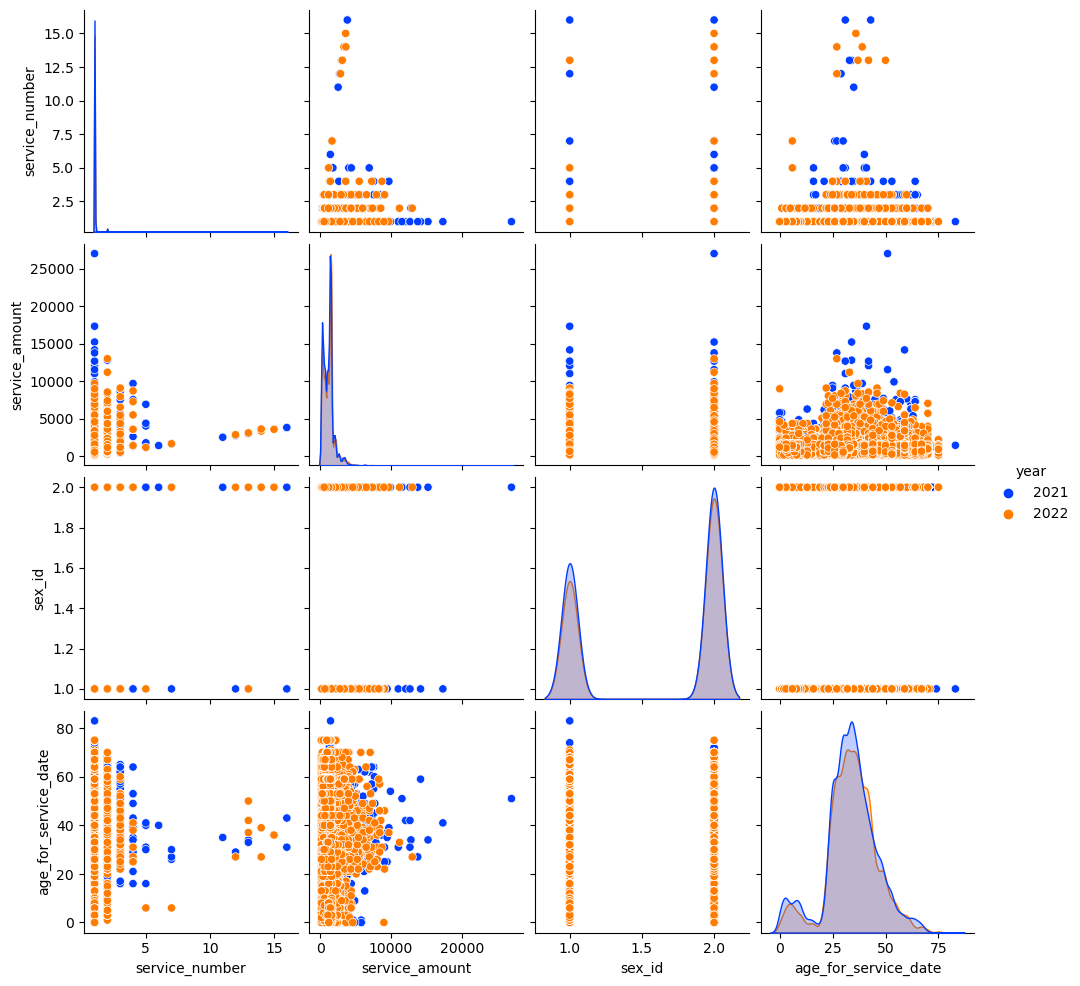

In [13]:
plt.figure(figsize=(12,8), dpi=150)
sns.pairplot (df[['service_number', 'service_amount', 'sex_id', 'age_for_service_date', 'year']] , hue='year', palette="bright")
plt.show()

При первом взгляде на данные видим, что в данных 2022 года немного меньше выбросов в столбце service_amount, - меньше аномально дорогих услуг. В остальном данные схожи.
Распределение данных отличается от нормального.
Отсутствует очевидная корреляция.

Рассмотрим подробнее корреляцию данных на корреляционной матрице и хитмапе

In [14]:
corr_matrix = round(df.corr(method='spearman', numeric_only=True), 2)

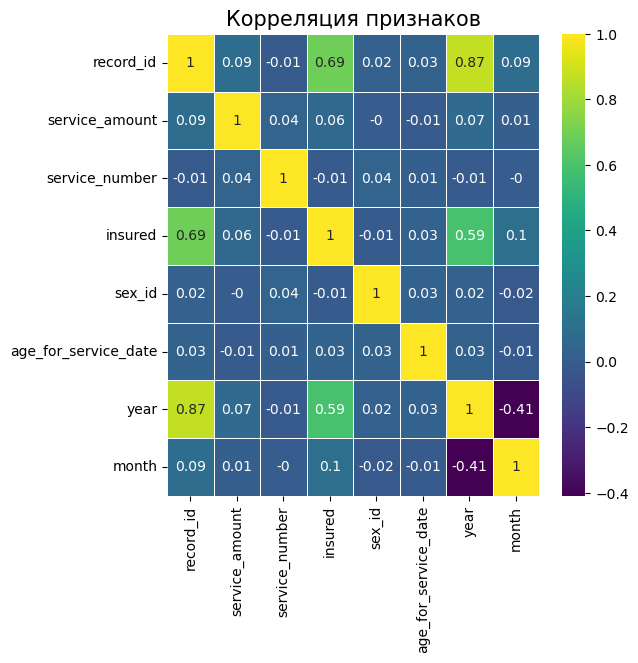

In [15]:
corr_matrix 

plt.figure(figsize=(6,6))
sns.heatmap(data=corr_matrix, cmap='viridis', linewidth=0.5,annot=True);
plt.title('Корреляция признаков', fontsize=15)
plt.show()

Значимой корреляции не наблюдается.

Рассмотрим соотношение наблюдений по годам.

2021: 52%
2022: 48%


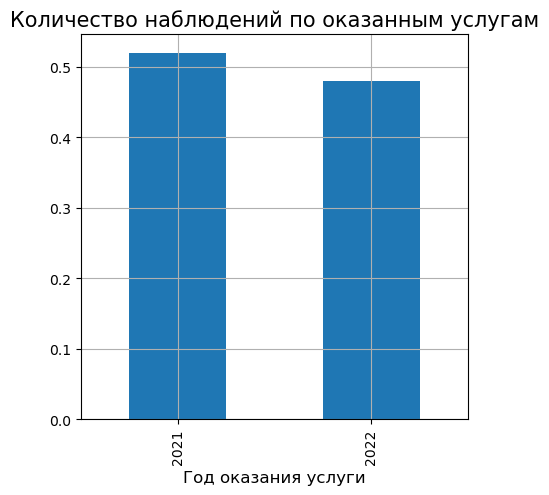

In [16]:

groups = df['year'].value_counts(normalize=True)
for year, percent in groups.items():
    print(f'{year}: {percent*100:.0f}%')

groups.plot(kind='bar', grid=True, figsize=(5, 5))
plt.title('Количество наблюдений по оказанным услугам', fontsize=15)
plt.xlabel('Год оказания услуги', fontsize=12)
plt.show()

Распределение данных по годам составляет 52% на 48%, что позволит нам корректно сравнить выборки.

### 2. Анализ пациентов

Рассмотрим поло-возрастную структуру пациентов:

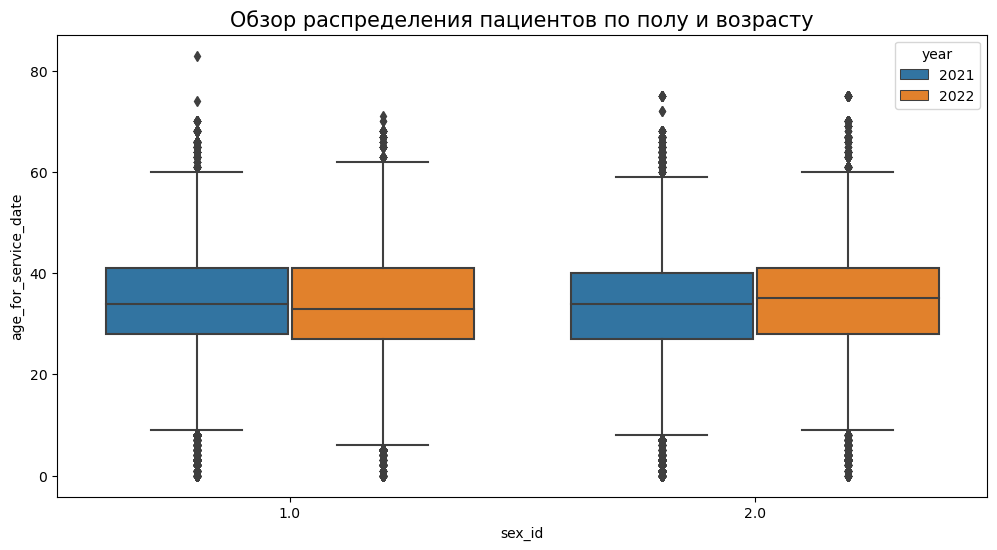

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex_id',y='age_for_service_date',data=df,hue='year')

plt.title('Обзор распределения пациентов по полу и возрасту', fontsize=15)
plt.show()

Из графика видно, что "портерт" пациента практически не изменился в 2022 году. Медианные значения, межквартильный размах, минимумы и максимумы значений практически не изменились. Данные из обоих выборок содержат примерно равное количество выбросов.

Разделим данные на 2 датафрейма по годам для дальнейшего анализа.

In [18]:
df_2021 = df[df['year'] == 2021].copy()
df_2022 = df[df['year'] == 2022].copy()

display(df_2021, df_2022)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26,2021,1
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26,2021,1
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26,2021,1
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26,2021,1
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26,2021,1
...,...,...,...,...,...,...,...,...,...,...
44387,31814305203,2021-12-09,Взятие секрета предстательной железы,380,1,568887,1.0,39,2021,12
44388,31814305303,2021-12-09,Взятие мазка,360,1,568887,1.0,39,2021,12
44389,31814305403,2021-12-09,Урофлуометрия,950,1,568887,1.0,39,2021,12
44390,31814305503,2021-12-09,Исследование сока простаты,460,1,568887,1.0,39,2021,12


,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month
44392,31996230303,2022-01-11,Магнитотерапия (1 сеанс),1090,1,625892,1.0,33,2022,1
44393,31996230403,2022-01-11,СМТ-форез (1 сеанс) (2 поля),950,1,625892,1.0,33,2022,1
44394,31996230503,2022-01-18,"Прием невролога, повторный",1380,1,625892,1.0,33,2022,1
44395,31996230603,2022-01-18,Магнитотерапия (1 сеанс),1090,1,625892,1.0,33,2022,1
44396,31996230703,2022-01-18,"Прием физиотерапевта, повторный",1380,1,625892,1.0,33,2022,1
...,...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,2.0,30,2022,8
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,2.0,30,2022,8
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,2.0,30,2022,8
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,2.0,30,2022,8


In [19]:
unique_clients_21 = df_2021.groupby('year')['insured'].nunique().squeeze() 
unique_clients_22 = df_2022.groupby('year')['insured'].nunique().squeeze()
unique_clients_dif = round((unique_clients_22 - unique_clients_21) / unique_clients_21 *100, 2)
print(f"Разница в количестве уникальных клиентов в 2022г. относительно 2021г. составила: {unique_clients_dif}%")

Разница в количестве уникальных клиентов в 2022г. относительно 2021г. составила: 9.62%


### 3. Анализ распределения услуг

In [20]:
services_count_21 = df_2021.groupby('year')['service_name'].count().squeeze() 
services_count_22 = df_2022.groupby('year')['service_name'].count().squeeze() 
services_count_diff = round((services_count_22 - services_count_21) / services_count_21 *100, 2)
print(f"Разница в количестве уникальных услуг в 2022г. относительно 2021г. составила: {services_count_diff}%")

Разница в количестве уникальных услуг в 2022г. относительно 2021г. составила: -7.69%


Рассмотрим 30 наиболее популярных медицинских услуг по годам

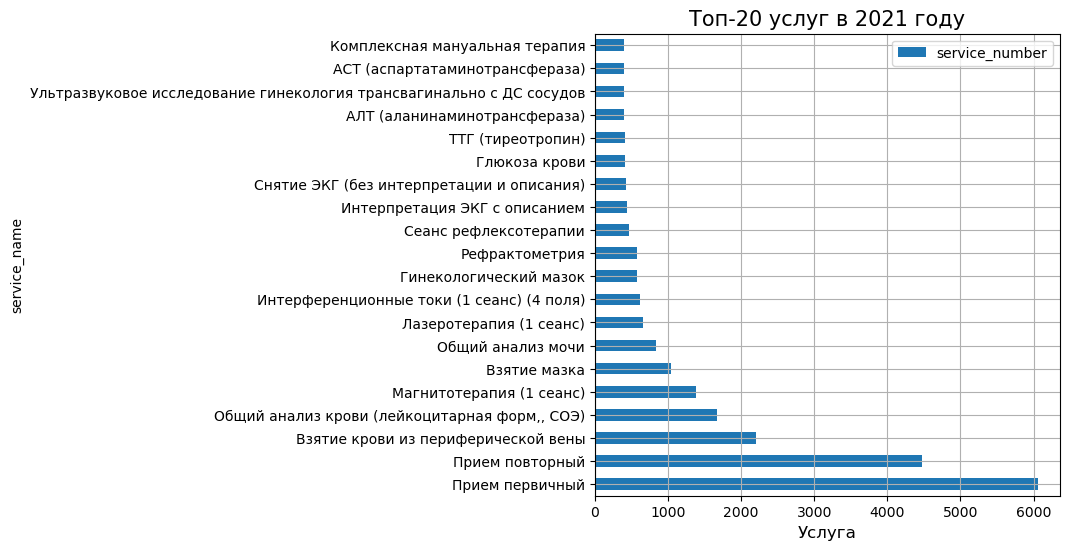

In [21]:
df_2021_temp = (
    df_2021.pivot_table(index='service_name', values='service_number', aggfunc='sum')
    .sort_values(by='service_number', ascending=False)[:20]
)


df_2021_temp.plot(kind='barh' , grid=True, figsize=(6, 6))
plt.title('Топ-20 услуг в 2021 году', fontsize=15)
plt.xlabel('Услуга', fontsize=12)
plt.show()

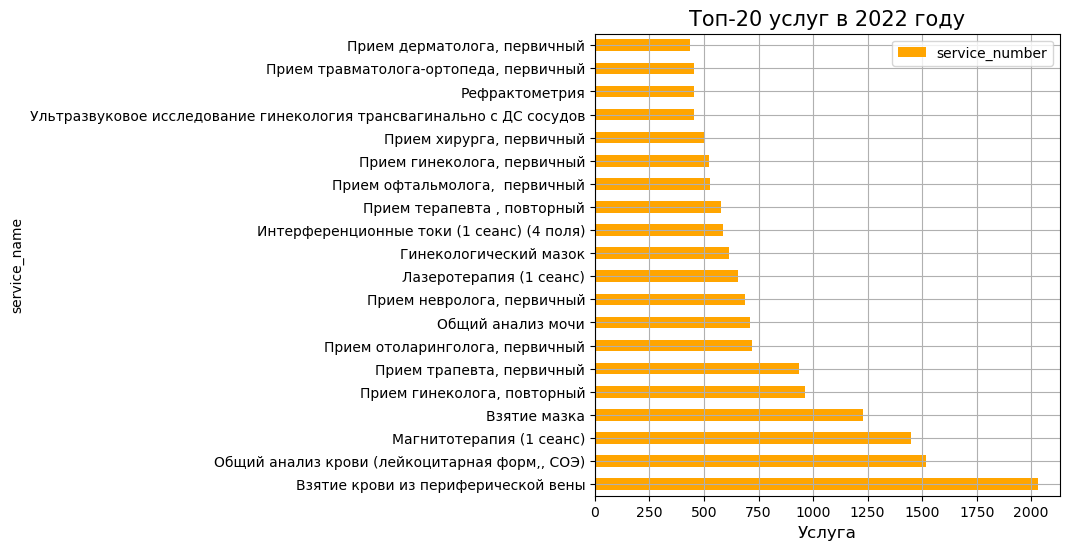

In [22]:
df_2022_temp = (
    df_2022.pivot_table(index='service_name', values='service_number', aggfunc='sum')
    .sort_values(by='service_number', ascending=False)[:20]
)


df_2022_temp.plot(kind='barh' , grid=True, figsize=(6, 6), color='orange')
plt.title('Топ-20 услуг в 2022 году', fontsize=15)
plt.xlabel('Услуга', fontsize=12)
plt.show()

Из графика видим, что в целом картина по составу наиболее часто назначаемых анализов и процедур не изменилась. Однако в 2022 году возрасла популярность приемов узконаправленных специалистов.

### 4. Анализ стоимости услуг

In [23]:
avg_revenue_dif = round((df_2022['service_amount'].mean() - df_2021['service_amount'].mean()) / df_2021['service_amount'].mean() *100, 2)
avg_snumber_dif = round((df_2022['service_number'].mean() - df_2021['service_number'].mean()) / df_2021['service_number'].mean() *100, 2)
print(f"Разница в среднем количестве назначаемых услуг в 2022г. относительно 2021г. составила: {avg_snumber_dif}%")
print(f"Разница в средней стоимости услуг в 2022г. относительно 2021г. составила: {avg_revenue_dif}%")

Разница в среднем количестве назначаемых услуг в 2022г. относительно 2021г. составила: -0.39%
Разница в средней стоимости услуг в 2022г. относительно 2021г. составила: 4.96%


Рассмотрим данные в рамках одного визита:

In [24]:
visit_2021 = df_2021.groupby(['service_date','insured'])[['service_amount','service_number']].sum().reset_index()
visit_2021

,service_date,insured,service_amount,service_number
0,2021-01-03,142427,1313,1
1,2021-01-03,142562,1470,1
2,2021-01-03,174009,2784,4
3,2021-01-03,176359,5157,4
4,2021-01-03,194308,873,3
...,...,...,...,...
15855,2021-12-31,744008,1380,1
15856,2021-12-31,756962,2040,1
15857,2021-12-31,774329,2790,2
15858,2021-12-31,774336,3080,2


In [25]:
visit_2021.describe()

,service_date,insured,service_amount,service_number
count,15860,15860.000000,15860.000000,15860.000000
mean,2021-07-21 01:14:16.191677440,506827.300757,3187.999433,2.868411
min,2021-01-03 00:00:00,125073.000000,158.000000,1.000000
25%,2021-04-26 00:00:00,402419.000000,1470.000000,1.000000
50%,2021-07-28 00:00:00,514032.000000,2290.000000,2.000000
75%,2021-10-16 00:00:00,639602.000000,4030.000000,3.000000
max,2021-12-31 00:00:00,774393.000000,45333.000000,33.000000
std,NaN,172347.193486,2650.210203,2.976126


In [26]:
visit_2022 = df_2022.groupby(['service_date','insured'])[['service_amount', 'service_number']].sum().reset_index()
visit_2022

,service_date,insured,service_amount,service_number
0,2022-01-03,159996,1650,1
1,2022-01-03,243226,1540,1
2,2022-01-03,306082,9630,14
3,2022-01-03,355926,1540,1
4,2022-01-03,490585,1380,1
...,...,...,...,...
14429,2022-08-31,1303034,1620,1
14430,2022-08-31,1303046,8180,3
14431,2022-08-31,1306753,2446,3
14432,2022-08-31,1306765,6480,3


In [27]:
visit_2022.describe()

,service_date,insured,service_amount,service_number
count,14434,1.443400e+04,14434.000000,14434.000000
mean,2022-04-30 17:20:08.646251776,8.016489e+05,3393.838298,2.897880
min,2022-01-03 00:00:00,1.250940e+05,170.000000,1.000000
25%,2022-03-12 00:00:00,6.519340e+05,1540.000000,1.000000
50%,2022-05-02 00:00:00,8.423260e+05,2480.000000,2.000000
75%,2022-06-18 00:00:00,9.355500e+05,4200.000000,3.000000
max,2022-08-31 00:00:00,1.306795e+06,47710.000000,35.000000
std,NaN,2.572145e+05,2865.031249,2.914394


In [28]:
avg_revenue_per_visit_dif = round((visit_2022['service_amount'].mean() - visit_2021['service_amount'].mean()) / visit_2021['service_amount'].mean() *100, 2)
avg_snumber_per_visit_dif = round((visit_2022['service_number'].mean() - visit_2021['service_number'].mean()) / visit_2021['service_number'].mean() *100, 2)
print(f"Разница в среднем количестве назначаемых услуг за 1 визит в 2022г. относительно 2021г. составила: {avg_snumber_per_visit_dif}%")
print(f"Разница в средней стоимости услуг за 1 визит в 2022г. относительно 2021г. составила: {avg_revenue_per_visit_dif}%")

Разница в среднем количестве назначаемых услуг за 1 визит в 2022г. относительно 2021г. составила: 1.03%
Разница в средней стоимости услуг за 1 визит в 2022г. относительно 2021г. составила: 6.46%


Рассмотрим данные в рамках одного медецинского кейса:

In [29]:
df_temp_21 = df_2021.sort_values(by=['insured', 'service_date'])
df_2021['days_diff'] = df_temp_21.groupby('insured')['service_date'].diff().dt.days.fillna(0)
df_2021['medical_case'] = (df_2021['days_diff'] > 14).cumsum()
med_case_2021 = df_2021.groupby(['insured', 'medical_case'])[['service_amount', 'service_number']].sum().reset_index()

med_case_2021

,insured,medical_case,service_amount,service_number
0,125073,5,9274,7
1,125073,1272,9746,9
2,125073,1454,6500,4
3,125073,1799,7560,7
4,125094,13,4479,4
...,...,...,...,...
7248,774389,1967,12140,11
7249,774390,2019,2490,3
7250,774391,2048,4030,4
7251,774392,2111,3080,2


In [30]:
med_case_2021.describe()

,insured,medical_case,service_amount,service_number
count,7253.000000,7253.000000,7253.000000,7253.000000
mean,505768.848752,948.956432,6971.138977,6.272301
std,173781.568962,674.664438,7218.529034,6.316060
min,125073.000000,0.000000,158.000000,1.000000
25%,402409.000000,313.000000,2048.000000,2.000000
50%,515217.000000,895.000000,4392.000000,4.000000
75%,639935.000000,1548.000000,9076.000000,9.000000
max,774393.000000,2178.000000,86500.000000,56.000000


In [31]:
df_temp_22 = df_2022.sort_values(by=['insured', 'service_date'])
df_2022['days_diff'] = df_temp_22.groupby('insured')['service_date'].diff().dt.days.fillna(0)
df_2022['medical_case'] = (df_2022['days_diff'] > 14).cumsum()
med_case_2022 = df_2022.groupby(['insured', 'medical_case'])[['service_amount', 'service_number']].sum().reset_index()

med_case_2022

,insured,medical_case,service_amount,service_number
0,125094,473,6380,6
1,142438,8,8630,10
2,142447,6,4950,6
3,142447,19,7940,8
4,142447,123,3040,3
...,...,...,...,...
6818,1306775,1490,9955,5
6819,1306792,1472,28054,25
6820,1306792,1474,34988,30
6821,1306795,1479,7500,8


In [32]:
med_case_2022.describe()

,insured,medical_case,service_amount,service_number
count,6.823000e+03,6823.000000,6823.000000,6823.000000
mean,8.017241e+05,624.169427,7179.636817,6.130441
std,2.563163e+05,480.303947,7059.733715,5.966828
min,1.250940e+05,0.000000,170.000000,1.000000
25%,6.519150e+05,185.000000,2240.000000,2.000000
50%,8.299910e+05,536.000000,4690.000000,4.000000
75%,9.355505e+05,1029.500000,9530.000000,8.000000
max,1.306795e+06,1581.000000,55980.000000,49.000000


In [33]:
avg_revenue_per_mcase_dif = round((med_case_2022['service_amount'].mean() - med_case_2021['service_amount'].mean()) / med_case_2021['service_amount'].mean() *100, 2)
avg_snumber_per_mcase_dif = round((med_case_2022['service_number'].mean() - med_case_2021['service_number'].mean()) / med_case_2021['service_number'].mean() *100, 2)

print(f"Разница в среднем количестве назначаемых услуг в рамках 1 кейса в 2022г. относительно 2021г. составила: {avg_snumber_per_mcase_dif}%")
print(f"Разница в средней стоимости услуг в рамках 1 кейса в 2022г. относительно 2021г. составила: {avg_revenue_per_mcase_dif}%")

Разница в среднем количестве назначаемых услуг в рамках 1 кейса в 2022г. относительно 2021г. составила: -2.26%
Разница в средней стоимости услуг в рамках 1 кейса в 2022г. относительно 2021г. составила: 2.99%


### 5. Тренд и сезонность

In [34]:
df.set_index('service_date', inplace=True)
df_trend = df.resample('1W').size()
df_trend = df_trend.sort_index(ascending=True)

df_trend.head()

service_date
2021-01-03     49
2021-01-10    451
2021-01-17    501
2021-01-24    483
2021-01-31    537
Freq: W-SUN, dtype: int64

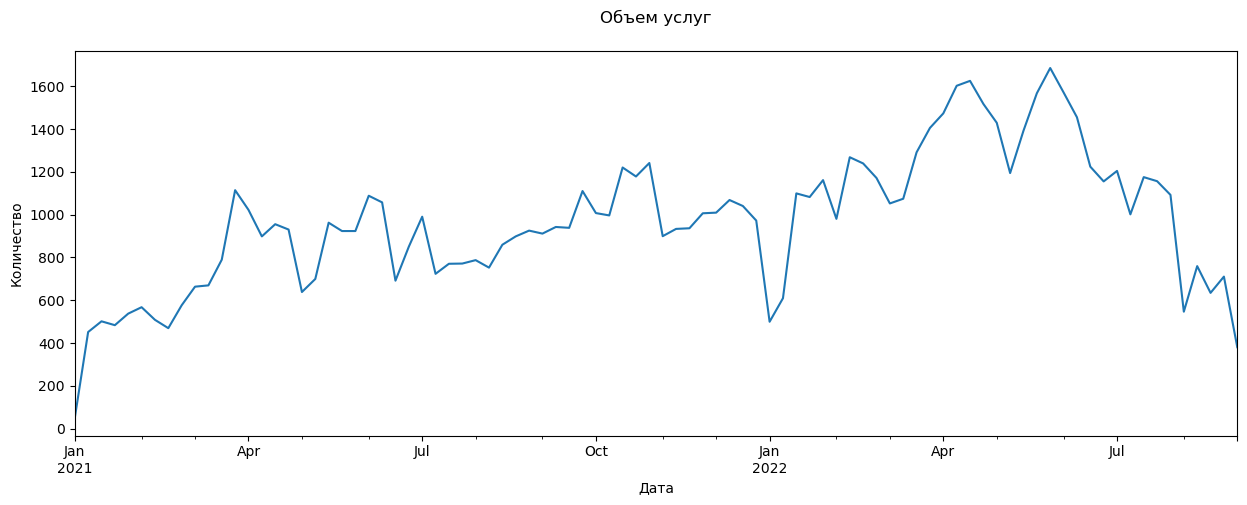

In [35]:
df_trend.plot(figsize=(15,5))
plt.title('Объем услуг', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Количество');

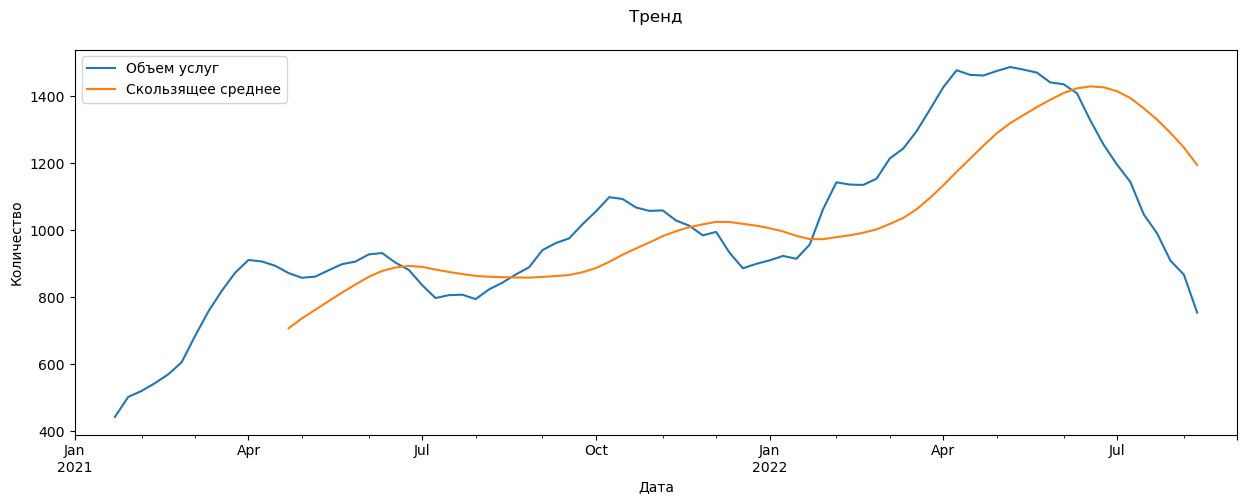

In [36]:
decomposed_df = seasonal_decompose(df_trend, period=7)
decomposed_df.trend.plot(ax=plt.gca(),figsize=(15,5))
decomposed_df.trend.resample('1W').mean().rolling(14).mean().plot(ax=plt.gca(),figsize=(15,5))
plt.legend(['Объем услуг', 'Скользящее среднее'])
plt.title('Тренд', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Количество');

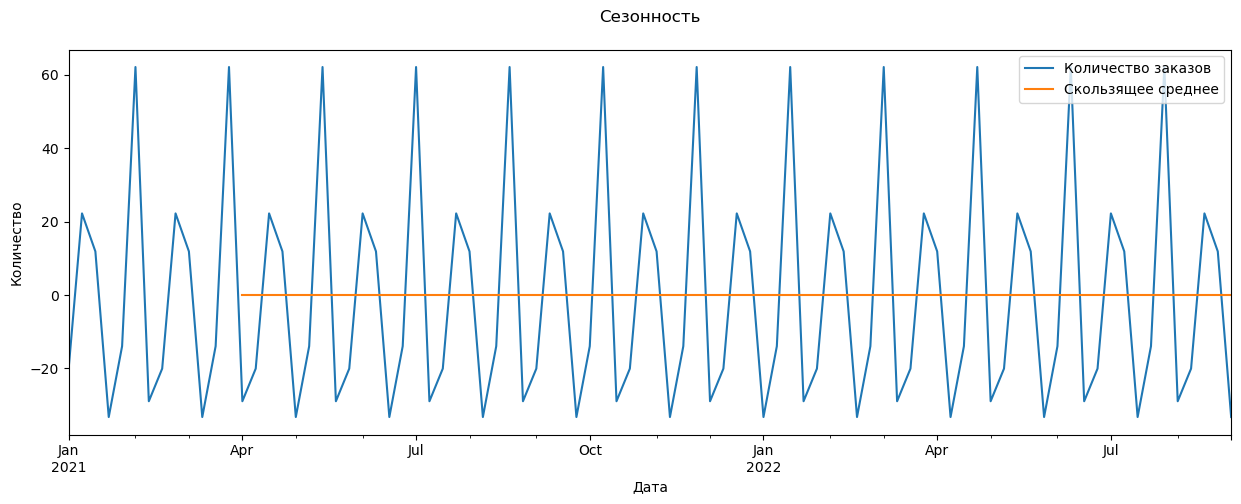

In [37]:
decomposed_df.seasonal.plot(ax=plt.gca(),figsize=(15,5))
decomposed_df.seasonal.resample('1W').mean().rolling(14).mean().plot(ax=plt.gca(),figsize=(15,5))
plt.legend(['Количество заказов', 'Скользящее среднее'])
plt.title('Сезонность', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Количество');

**Выводы:** 

Провели ислледовательский анализ-сравнение данных за 2 года и пришли к следующим выводам:

1) При первом взгляде на данные видим, что в данных 2022 года немного меньше выбросов в столбце service_amount, - меньше аномально дорогих услуг. В остальном данные схожи.
2) Распределение данных отличается от нормального.
3) Отсутствует значимая корреляция в данных.
4) Поло-возрастной портрет пациента остался практически не изменным, однако общее количество уникальных клиентов выросло. 
5) Уникальное количество услуг уменьшилось на 7%.
6) Состав наиболее часто назначаемых анализов и процедур не изменился. Однако в 2022 году возрасла популярность приемов узконаправленных специалистов.
7) Наблюдается тренд на постепенное увелечение объема оказываемых услуг.
8) График сезонности монотонный - сезонность отсутствует.
9) Наблюдаются изменения в средней цене и количестве услуг, также в разрезе одного визита и медецинского кейса в соответствии с приведенной таблицей:

In [38]:
column=['Отличие данных за 22г. от 21г. в %']

comparison_table = pd.DataFrame(index=['%'], 
                                columns=['Количество уникальных клиентов', 
                                         'Количество уникальных услуг', 
                                         'Среднее количество назначаемых услуг', 
                                         'Средняя стоимость услуг', 
                                         'Средняя стоимость услуг \ 1 визит', 
                                         'Среднее количество услуг \ 1 визит',
                                         'Средняя стоимость услуг \ кейс', 
                                         'Среднее количество услуг \ кейс']) 

comparison_table['Количество уникальных клиентов'] = unique_clients_dif
comparison_table['Количество уникальных услуг'] = services_count_diff 
comparison_table['Среднее количество назначаемых услуг'] = avg_snumber_dif
comparison_table['Средняя стоимость услуг'] = avg_revenue_dif
comparison_table['Средняя стоимость услуг \ 1 визит'] = avg_revenue_per_visit_dif
comparison_table['Среднее количество услуг \ 1 визит'] = avg_snumber_per_visit_dif
comparison_table['Средняя стоимость услуг \ кейс'] = avg_revenue_per_mcase_dif
comparison_table['Среднее количество услуг \ кейс'] = avg_snumber_per_mcase_dif

comparison_table

,Количество уникальных клиентов,Количество уникальных услуг,Среднее количество назначаемых услуг,Средняя стоимость услуг,Средняя стоимость услуг \ 1 визит,Среднее количество услуг \ 1 визит,Средняя стоимость услуг \ кейс,Среднее количество услуг \ кейс
%,9.62,-7.69,-0.39,4.96,6.46,1.03,2.99,-2.26


### Формирование и проверка гипотез

На основе исследовательского анализа данных сформируем несколько гипотез:

1. Стоимость обслуживания пациентов изменилась
2. Средняя стоимость обслуживания изменилась из-за изменения количества уникальных клиентов
3. Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
4. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг за один визит
5. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс

In [39]:
def normality_test(df, column):
    
    data = df[column]
    stat, p = normaltest(data)

    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
	    print('Нормальное распределение')
    else:
	    print('Не является нормальным распределением')

### 1. Стоимость обслуживания пациентов изменилась

Н0 = стоимость услуг не изменилась

Н1 = изменения в стоимости услуг являются статитстически значимыми

In [40]:
normality_test(df, 'service_amount')

stat=58012.922, p=0.000
Не является нормальным распределением


In [41]:
stat, p = mannwhitneyu(df_2021['service_amount'], df_2022['service_amount'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Стоимость услуг не изменилась')
else:
	print('Отвергаем нулевую гипотезу. Изменения в стоимости обслуживания пациентов являются статистически значимыми')

stat=832709116.500, p=0.000
Отвергаем нулевую гипотезу. Изменения в стоимости обслуживания пациентов являются статистически значимыми


### 2. Средняя стоимость обслуживания изменилась из-за изменения количества уникальных клиентов

Н0 = количество уникальных клиентов и стоимость услуг не зависимы

Н1 = зависимость между количеством уникальных клиентов и стоимостю услуг статистически значима

In [42]:
unique_clients_corr = df.groupby(['year', 'month'])['insured'].nunique().reset_index()
unique_clients_corr.columns = ['year', 'month', 'unique_clients']

unique_clients_corr.head()

,year,month,unique_clients
0,2021,1,286
1,2021,2,309
2,2021,3,446
3,2021,4,467
4,2021,5,469


In [43]:
amount_corr = df.groupby(['year', 'month'])['service_amount'].sum().reset_index()
amount_corr.columns = ['year', 'month', 'service_amount']

amount_corr.head()

,year,month,service_amount
0,2021,1,2265931
1,2021,2,2379125
2,2021,3,3927248
3,2021,4,4380487
4,2021,5,4298978


In [44]:
normality_test(unique_clients_corr, 'unique_clients')

stat=0.210, p=0.900
Нормальное распределение


In [45]:
normality_test(amount_corr, 'service_amount')

stat=0.340, p=0.844
Нормальное распределение


In [46]:
stat, p = pearsonr(unique_clients_corr['unique_clients'], amount_corr['service_amount'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Выборки не зависимы')
else:
	print('Отвергаем нулевую гипотезу. Зависимость между количеством уникальных клиентов и стоимостю услуг статистически значима')

stat=0.979, p=0.000
Отвергаем нулевую гипотезу. Зависимость между количеством уникальных клиентов и стоимостю услуг статистически значима


### 3. Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги

Н0 = цены не изменились

Н1 = изменение цен является статитстически значимыми

In [47]:
service_name_21 = round(df_2021.groupby(['service_name'])['service_amount'].sum().reset_index(),2)
service_name_21.shape

(739, 2)

In [48]:
service_name_22 = round(df_2022.groupby(['service_name'])['service_amount'].sum().reset_index(),2)
service_name_22.shape

(679, 2)

Выберем услуги, которые были в прайс-листе как 21, так и 22г.

In [49]:
service_unique = service_name_21.merge(service_name_22, on=['service_name'], how='inner')


service_unique.columns = ['service_name', 'service_amount_2021', 'service_amount_2022']

service_unique.head()

,service_name,service_amount_2021,service_amount_2022
0,"(Б1 (11))Аллергопанель IgE шерсть кошки, шерст...",5867,10640
1,17-OH - гидроксипрогестерон,1830,3660
2,25-OH витамин D (25-гидроксихолекальциферол),33045,6840
3,Bordetella (pertusis) IgA,970,1940
4,Bordetella (pertusis) IgG,1260,2010


In [50]:
normality_test(service_unique, 'service_amount_2021')

stat=606.556, p=0.000
Не является нормальным распределением


In [51]:
normality_test(service_unique, 'service_amount_2022')

stat=461.262, p=0.000
Не является нормальным распределением


In [52]:
stat, p = mannwhitneyu(service_unique['service_amount_2021'], service_unique['service_amount_2022'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Цены не изменились')
else:
	print('Отвергаем нулевую гипотезу.Изменение цен является статитстически значимыми') 

stat=145034.000, p=0.644
Цены не изменились


### 4. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг за один визит

Н0 = среднее количество оказанных услуг за один визит не изменилось

Н1 = изменение среднего количества оказанных услуг за один визит является статитстически значимым

In [53]:
normality_test(visit_2021, 'service_number')

stat=11262.202, p=0.000
Не является нормальным распределением


In [54]:
normality_test(visit_2022, 'service_number')

stat=9969.613, p=0.000
Не является нормальным распределением


In [55]:
stat, p = mannwhitneyu(visit_2021['service_number'], visit_2022['service_number'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Среднее количество оказанных услуг за один визит не изменилось')
else:
	print('Изменение среднего количества оказанных услуг за один визит является статитстически значимым') 

stat=112449286.000, p=0.006
Изменение среднего количества оказанных услуг за один визит является статитстически значимым


Н0 = среднее количество оказанных услуг за один визит и стоимость услуг за один визит не зависимы

Н1 = среднее количество оказанных услуг за один визит и стоимость услуг за один визит зависимы

In [56]:
stat, p = spearmanr(visit_2022['service_number'], visit_2022['service_amount'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Выборки не зависимы')
else:
	print('Отвергаем нулевую гипотезу. Cреднее количество оказанных услуг за один визит и стоимость услуг за один визит зависимы')

stat=0.823, p=0.000
Отвергаем нулевую гипотезу. Cреднее количество оказанных услуг за один визит и стоимость услуг за один визит зависимы


### 5. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс

Н0 = среднее количество оказанных услуг на один кейс не изменилось

Н1 = изменение среднего количества оказанных услуг на один кейс является статитстически значимым

In [57]:
normality_test(med_case_2021, 'service_number')

stat=2587.670, p=0.000
Не является нормальным распределением


In [58]:
normality_test(med_case_2022, 'service_number')

stat=2378.048, p=0.000
Не является нормальным распределением


In [59]:
stat, p = mannwhitneyu(med_case_2021['service_number'], med_case_2022['service_number'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Среднее количество оказанных услуг на один кейс не изменилось')
else:
	print('Отвергаем нулевую гипотезу. Изменение среднего количества оказанных услуг на один кейс является статитстически значимым') 

stat=24682161.000, p=0.797
Среднее количество оказанных услуг на один кейс не изменилось


### Выводы:

Цель исследования - провести анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике и определить ключевые драйверы изменения цены лечения. 

Проведена предобработка данных:
1) Заполнены пропуски в данных модой. Пропуски сотвили не более 1%.
2) Столбец с датами приведен в нужный формат
3) Добавлены отдельные столбцы с месяцем и годом



Провели ислледовательский анализ-сравнение данных за 2 года и пришли к следующим выводам:

1) При первом взгляде на данные видим, что в данных 2022 года немного меньше выбросов в столбце service_amount, - меньше аномально дорогих услуг. В остальном данные схожи.
2) Распределение данных отличается от нормального.
3) Отсутствует значимая корреляция в данных.
4) Поло-возрастной портрет пациента остался практически не изменным, однако общее количество уникальных клиентов выросло. 
5) Уникальное количество услуг уменьшилось на 7%.
6) Состав наиболее часто назначаемых анализов и процедур не изменился. Однако в 2022 году возрасла популярность приемов узконаправленных специалистов.
7) Наблюдается тренд на постепенное увелечение объема оказываемых услуг.
8) График сезонности монотонный - сезонность отсутствует.
9) Наблюдаются изменения в средней цене и количестве услуг, также в разрезе одного визита и медецинского кейса в соответствии с приведенной таблицей:

In [60]:
column=['Отличие данных за 22г. от 21г. в %']

comparison_table = pd.DataFrame(index=['%'], 
                                columns=['Количество уникальных клиентов', 
                                         'Количество уникальных услуг', 
                                         'Среднее количество назначаемых услуг', 
                                         'Средняя стоимость услуг', 
                                         'Средняя стоимость услуг \ 1 визит', 
                                         'Среднее количество услуг \ 1 визит',
                                         'Средняя стоимость услуг \ кейс', 
                                         'Среднее количество услуг \ кейс']) 

comparison_table['Количество уникальных клиентов'] = unique_clients_dif
comparison_table['Количество уникальных услуг'] = services_count_diff 
comparison_table['Среднее количество назначаемых услуг'] = avg_snumber_dif
comparison_table['Средняя стоимость услуг'] = avg_revenue_dif
comparison_table['Средняя стоимость услуг \ 1 визит'] = avg_revenue_per_visit_dif
comparison_table['Среднее количество услуг \ 1 визит'] = avg_snumber_per_visit_dif
comparison_table['Средняя стоимость услуг \ кейс'] = avg_revenue_per_mcase_dif
comparison_table['Среднее количество услуг \ кейс'] = avg_snumber_per_mcase_dif

comparison_table

,Количество уникальных клиентов,Количество уникальных услуг,Среднее количество назначаемых услуг,Средняя стоимость услуг,Средняя стоимость услуг \ 1 визит,Среднее количество услуг \ 1 визит,Средняя стоимость услуг \ кейс,Среднее количество услуг \ кейс
%,9.62,-7.69,-0.39,4.96,6.46,1.03,2.99,-2.26


На основе анализа данных сформировали и проверили несколько гипотез:
1. Стоимость обслуживания пациентов изменилась
2. Средняя стоимость обслуживания изменилась из-за изменения количества уникальных клиентов
3. Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
4. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг за один визит
5. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс

В результате исследования данных и проверки гипотез сделали следующие выводы:

Что вероятно не повлияло на изменение стоимости обслуживания пациентов:

- Поло-возрастной портрет пациентов. Анализ данных на графике показал минимальные изменения
- Сезонность
- Увеличение цен в прайс-листе. Тестирование гипотезы не подтвердило наличие статистичеки значимых изменений.


Что вероятнее всего оказало влияние на изменение стоимости обслуживания пациентов:

- Увеличение количества уникальных клиентов. Анализ данных выявил, что количество уникальных клиентов возросло на 10%. 
Также корреляционный тест показал возможную значимую зависимость между количеством уникальных клиентов и стоимостью обслуживания.
- Изменение количества услуг за один визит. При этом статистическая значимость изменения количества услуг в рамках мед кейса не подтвердилась. 
Рассмотрев топ-20 популярных услуг в 2021г. и в 2022г., можно предположить, что на это повлияло увеличение интереса к врачам разного профиля 
(офтальмологи, дерматологи, ортопеды) и, вероятно, в связи с этим увеличению количества первичных приемов, на которых обычно назначается большая часть обследований.   
- Анализ времянных рядов показал наличие тренда на постепенное увелечине объема оказываемых услуг. 
